# Métodos e Ferramentas de Data Science
## Aula 3: Análise Exploratória de Dados (Introdução às bibliotecas pandas e matplotlib.pyplot)
### Exemplo: Cia Eletrônicos

## Carregando bibliotecas necessárias
Usaremos os pacotes `pandas` para manipulação de dados. Para visualizações, usaremos `matplotlib` (pyplot) e `seaborn`.

In [1]:
import pandas as pd    
# importa (deixa disponível para uso) a biblioteca pandas, usada para manipulação e análise de dados.
# O apelido pd é só uma convenção para facilitar o uso (em vez de escrever pandas.DataFrame(), poderemos escrever pd.DataFrame()).
# Essa biblioteca contém diversas funções úteis, por exemplo para lermos arquivos em Excel, CSV etc. (pd.read_excel, pd.read_csv), 
# manipular tabelas (DataFrames), agrupar, filtrar, transformar dados, calcular estatísticas como medidas de posição e de dispersão etc.

import matplotlib.pyplot as plt    
# essa linha importa a biblioteca matplotlib, mais especificamente o módulo pyplot, usado para fazer gráficos.
# Assim como chamamos pandas de pd, aqui estamos 'apelidando' o módulo de plt. Nele, há funções que nos permitem criar diversos tipos de gráficos.

import seaborn as sns    
# Essa biblioteca estende o matplotlib com gráficos estatísticos mais bonitos e fáceis de usar.
# Permite criar boxplots, violinplots, heatmaps, gráficos de dispersão com regressão, etc.

%matplotlib inline    
# magic command. Serve para mostrar os gráficos diretamente dentro do notebook, logo abaixo da célula de código. 
# Sem essa linha, os gráficos podem não aparecer automaticamente ou abrir em janelas separadas.

## Importar a base de dados
Aqui, vamos carregar a planilha Excel `Cia_Eletronicos.xlsx`.

In [2]:
dados = pd.read_excel('Cia_Eletronicos.xlsx', sheet_name='Dados')
# pd.read_excel() chama a função read_excel da biblioteca pd (pandas);
# precisamos oferecer à função o caminho em que se encontra a planilha em Excel para ser importada;
# a parte sheet_name='Dados' instrui a função a ler a aba 'Dados' do arquivo em questão (que pode ter várias abas);
# o conteúdo é armazenado como um DataFrame do pandas (tabela em Python) no objeto chamado dados. 

dados.head()
# Exibe as primeiras 5 linhas do DataFrame dados.
# Se não usarmos o sufixo .head(), todo o objeto tentará ser carregado e isso pode ser um problema se a base for grande (a tabela pode ser
# exibida de maneira truncada, inclusive, se for muito grande). 
# Uma alternativa é configurar o pandas para mostrar mais linhas e colunas:
# pd.set_option('display.max_rows', 200)     # mostra até 200 linhas
# pd.set_option('display.max_columns', None) # mostra todas as colunas
# dados

# Podemos também fazer a visualização por pedaços:
# dados[0:100]    # linhas de 0 a 99
# dados[-10:]     # últimas 10 linhas

,ID,Ultimo_Nome,Primeiro_Nome,Sexo,Idade,Departamento,Tempo_Empresa,Salario_Anual,Nota
0,1075,Dickens,Jimmy,M,60,A,42,74500.000000,7.4
1,1161,Anderson,James,M,61,B,41,73397.397499,9.0
2,1311,Long,Peggy,F,57,A,39,71668.997726,6.0
3,1506,Gebhardt,Virginia,F,57,B,37,69433.997726,8.8
4,1543,Ammann,Ray,M,60,A,37,70775.000000,4.8


## Explorando a estrutura dos dados

In [ ]:
dados.info()    # Exibe um resumo da estrutura do DataFrame (número de linhas e colunas, valores não nulos, nomes das colunas, uso de memória...)
# É muito interessante para:
# - verificarmos se há valores ausentes (nulls) em alguma coluna; 
# - checarmos os tipos de dados (importante antes de aplicar funções estatísticas ou gráficos); e
# - termos uma visão geral rápida da base.

# Interpretação:
# dtypes: float64(2), int64(3), object(4)
# O DataFrame tem 2 colunas com números decimais (float64 ou ponto flutuante de 64 bits);
# 3 colunas com números inteiros (int64 ou número inteiro de 64 bits);
# 4 colunas com texto ou outros tipos genéricos (object designa um tipo genérico: normalmente strings, mas também pode conter misturas de tipos).

# Alguns comentários:
# Alguns cálculos ou gráficos só funcionam com float ou int.
# Colunas como "Sexo" ou "Departamento" devem ser object ou category, e não numéricas.
# Se um número for lido como object (ex: "42" como texto), podemos ter problemas para calcular a média ou somar — então pode ser necessário converter com pd.to_numeric().

dados.describe()    # Gera um resumo estatístico das colunas numéricas (por padrão), mostrando:
# Contagem de valores (count)
# Média (mean)
# Desvio-padrão (std)
# Valores mínimo e máximo
# Quartis (25% - Q1, 50% - mediana, 75% - Q3)

print(resumo)    # Exibe o resumo estatístico gerado na linha anterior.
# Podemos usar o método .describe() para colunas específicas, por exemplo:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             155 non-null    int64  
 1   Ultimo_Nome    155 non-null    object 
 2   Primeiro_Nome  155 non-null    object 
 3   Sexo           155 non-null    object 
 4   Idade          155 non-null    int64  
 5   Departamento   155 non-null    object 
 6   Tempo_Empresa  155 non-null    int64  
 7   Salario_Anual  155 non-null    float64
 8   Nota           155 non-null    float64
dtypes: float64(2), int64(3), object(4)
memory usage: 11.0+ KB
                ID       Idade  Tempo_Empresa  Salario_Anual        Nota
count   155.000000  155.000000     155.000000     155.000000  155.000000
mean   4153.083871   40.283871      11.122581   53663.840032    6.373548
std     999.598997   11.848478       9.778943    6527.135161    1.598663
min    1075.000000   19.000000       1.000000   44700.000

In [8]:
# E se quisermos visualizar estatísticas descritivas das variáveis categóricas?

dados.describe(include='object')

# Este comando mostra um resumo apenas das colunas categóricas, ou seja, aquelas com dtype = object.
# Retorna, para cada coluna qualitativa:
# count: número de valores não nulos
# unique: número de categorias distintas
# top: valor mais frequente (moda)
# freq: frequência do valor mais frequente

,Ultimo_Nome,Primeiro_Nome,Sexo,Departamento
count,155,155,155,155
unique,153,129,2,4
top,Wilson,Debbie,F,A
freq,2,4,89,41


In [9]:
### Outros comandos para a estrutura básica do DataFrame:
dados.shape         # (linhas, colunas)

(155, 9)

In [10]:
### Outros comandos para a estrutura básica do DataFrame:
dados.columns       # nomes das colunas

# Observe que nesta saída aparecerá dtype = 'object'.
# Isso não quer dizer que os dados nas colunas são object — apenas que os nomes das colunas são strings!

Index(['ID', 'Ultimo_Nome', 'Primeiro_Nome', 'Sexo', 'Idade', 'Departamento',
       'Tempo_Empresa', 'Salario_Anual', 'Nota'],
      dtype='object')

In [11]:
### Outros comandos para a estrutura básica do DataFrame:
dados.dtypes        # tipos das variáveis

ID                 int64
Ultimo_Nome       object
Primeiro_Nome     object
Sexo              object
Idade              int64
Departamento      object
Tempo_Empresa      int64
Salario_Anual    float64
Nota             float64
dtype: object

## Estatísticas dos salários anuais - geral e por departamento

In [13]:
# Média e desvio-padrão geral
media_geral_salario = dados['Salario_Anual'].mean()
# dados['Salario_Anual'] : Acessa a coluna chamada Salario_Anual no DataFrame dados.
# .mean() : Aplica o método .mean() para calcular a média aritmética dos salários.
# media_geral = O resultado é armazenado na variável media_geral.

dp_geral_salario = dados['Salario_Anual'].std()
# Idem... ao invés da média, estamos agora calculando o desvio-padrão amostral (std)

print(f"Média dos salários anuais: {media_geral_salario:.2f}")
# Imprime a média formatada com duas casas decimais (:.2f)
# f"texto {variavel}" é uma f-string, usada para incorporar valores dentro do texto

print(f"Desvio-padrão: {dp_geral_salario:.2f}")


Média dos salários anuais: 53663.84
Desvio-padrão: 6527.14


In [16]:
# Estatísticas por departamento
resumo_departamentos = dados.groupby('Departamento')['Salario_Anual'].agg(['mean', 'std']).reset_index()
# Este trecho é bastante usual no contexto do pandas. O que está acontecendo:
# dados.groupby('Departamento'): agrupa o DataFrame por valores únicos na coluna Departamento.
# ['Salario_Anual']: aplica o agrupamento somente sobre a coluna Salario_Anual.
# .agg(['mean', 'std']): agrega os dados aplicando duas funções: média (mean) e desvio-padrão (std), para cada grupo (departamento).
# .reset_index(): transforma o índice do agrupamento de volta em coluna, criando um DataFrame "normal".

resumo_departamentos.columns = ['Departamento', 'Salario Anual Médio', 'Desvio Padrão']
# Aqui, simplesmente estamos renomeando os nomes das colunas do objeto resumo_departamentos. Tente rodar essa célula sem esta instrução e veja a diferença. 

resumo_departamentos

# Extra: rode esta célula sem o sufixo .reset_index() na primeira linha. Consegue perceber alguma diferença?
# Vantagens de manter o sufixo .reset_index():
# Facilita a manipulação dos dados com índice numérico
# Melhora a compatibilidade com outras operações (há funções que esperam que dados estejam em colunas, não no índice)

,Departamento,Salario Anual Médio,Desvio Padrão
0,A,54238.907508,7344.396829
1,B,54377.004764,7077.816878
2,C,53282.400272,6281.681648
3,D,52502.012209,4877.726962


## Boxplot dos salários por departamento

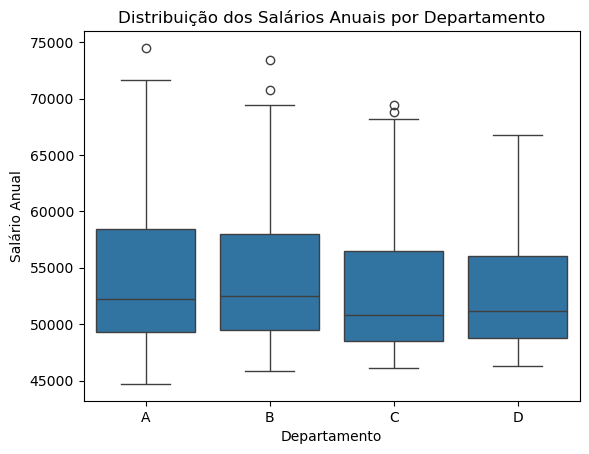

In [15]:
# plt.figure(figsize=(8, 5))
# Opcional. Define o tamanho do gráfico (polegadas), útil para evitar que os elementos fiquem espremidos ou desproporcionais.
sns.boxplot(data=dados, x='Departamento', y='Salario_Anual') 
plt.title('Distribuição dos Salários Anuais por Departamento')
plt.xlabel('Departamento')
plt.ylabel('Salário Anual')
# plt.tight_layout()
# Opcional. Ajusta automaticamente os espaçamentos internos da figura para que nenhum elemento (eixo, legenda, título) fique sobreposto ou cortado.
plt.show()

## Probabilidade de uma mulher ter salário acima da média

In [ ]:
total_mulheres = dados[dados['Sexo'] == 'F'].shape[0]
# Filtra o DataFrame 'dados' para manter somente as linhas onde o Sexo é feminino ('Sexo' == 'F'), e depois pega o número total dessas linhas.
# O sufixo .shape[0] retorna o número de linhas do DataFrame filtrado (nesse caso, o número de mulheres na amostra).
# O resultado é armazenado no objeto total_mulheres

mulheres_salario_acima_media = dados[(dados['Sexo'] == 'F') & (dados['Salario_Anual'] > media_geral_salario)].shape[0]
print(mulheres_salario_acima_media)
print(total_mulheres)
prop_mulheres_salario_acima_media = mulheres_salario_acima_media / total_mulheres

print(f"Probabilidade de uma mulher ter salário acima da média: {prop_mulheres_salario_acima_media:.3f}")

36
89
Probabilidade de uma mulher ter salário acima da média: 0.404


## Boxplot das notas por departamento

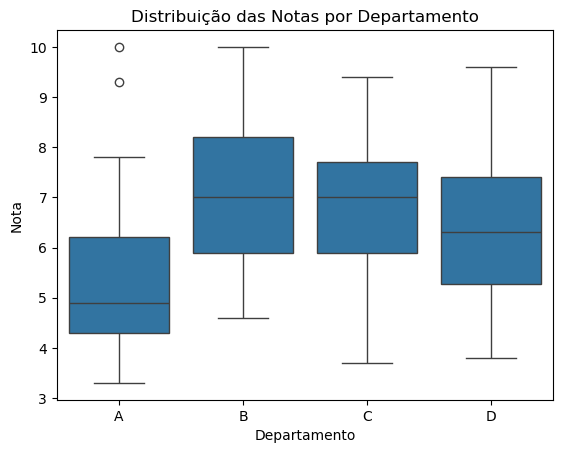

In [20]:
# plt.figure(figsize=(8, 5))
sns.boxplot(data=dados, x='Departamento', y='Nota')
plt.title('Distribuição das Notas por Departamento')
plt.xlabel('Departamento')
plt.ylabel('Nota')
# plt.tight_layout()
plt.show()

In [21]:
### Visualizando contagens de categorias de variáveis qualitativas
dados['Sexo'].value_counts()

# O sufixo .value_counts() serve para contar quantas vezes cada categoria ocorre na variável Sexo, do DataFrame dados.

Sexo
F    89
M    66
Name: count, dtype: int64

In [22]:
# Repetindo a mesma ideia, agora para a variável Departamento:
dados['Departamento'].value_counts()

Departamento
A    41
B    41
C    41
D    32
Name: count, dtype: int64

In [24]:
## E se quisermos montar tabelas?
# Usamos a função pd.crosstab()
# Exemplo:

pd.crosstab(dados['Sexo'], dados['Departamento'])

# A primeira variável é usada nas linhas, e a segunda variável é usada nas colunas. Tente transpor a tabela!

Departamento,A,B,C,D
Sexo,,,,
F,18,26,27,18
M,23,15,14,14


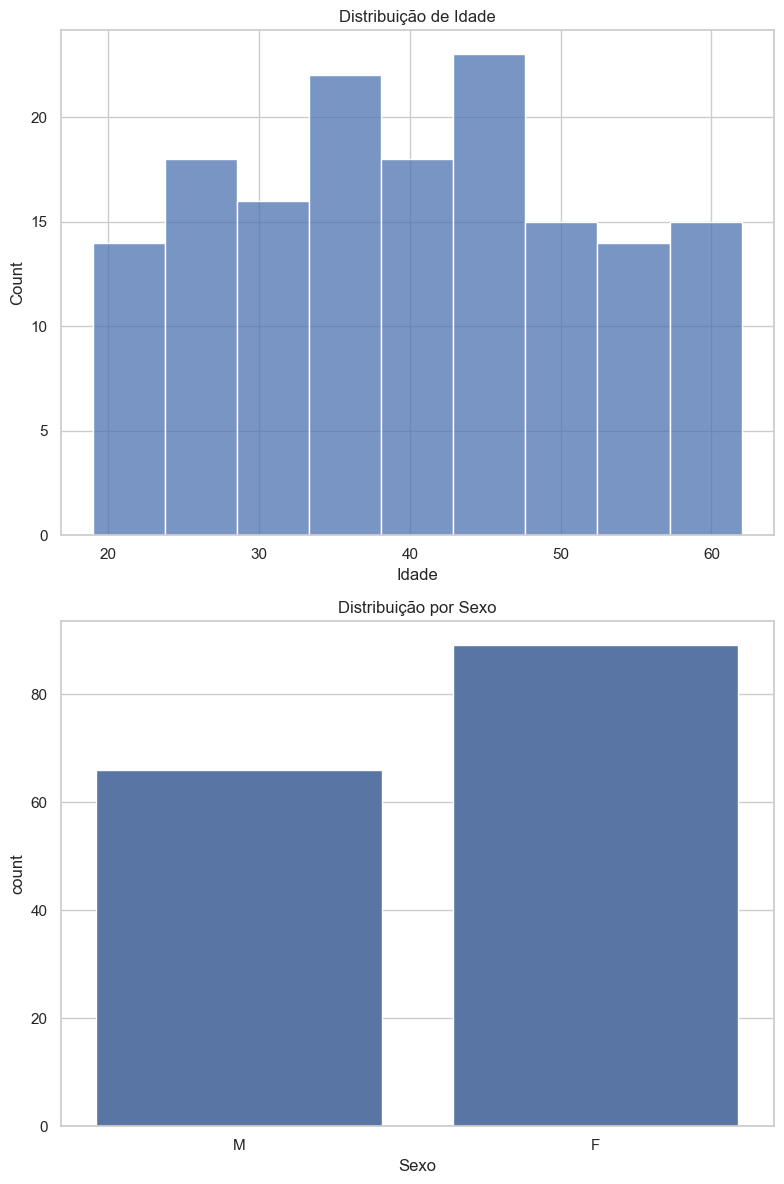

In [25]:
### Alguns outros exemplos de gráficos (exploraremos essa área na aula seguinte...):
# Definindo o estilo gráfico
sns.set(style="whitegrid")

# Criar uma figura com 2 subplots (um embaixo do outro)
fig, axs = plt.subplots(2, 1, figsize=(8, 12))  # (linhas, colunas, tamanho)

# 1. Histograma da Idade
sns.histplot(data=dados, x='Idade', ax=axs[0])
axs[0].set_title('Distribuição de Idade')

# 2. Gráfico de barras da contagem por Sexo
sns.countplot(data=dados, x='Sexo', ax=axs[1])
axs[1].set_title('Distribuição por Sexo')

# Ajusta layout para evitar sobreposição
plt.tight_layout()

# Exibe todos os gráficos
plt.show()


## Análise Livre
Como exercício final, cada grupo deve realizar uma análise própria.

Sugestões:
- Comparar salários e notas entre departamentos;
- Investigar disparidades de gênero dentro de cada departamento.

No mínimo o grupo deverá entregar um Jupyter notebook contendo um gráfico box-plot, uma tabela e uma análises com médias e desvios-padrões.

## Análise Gabriella Pinheiro

In [ ]:
# Análise de tempo de empresa
# Primeiro, vamos verificar os dados da coluna 'Tempo_Empresa'


tempo_describe = dados['Tempo_Empresa'].describe()
print(tempo_describe)


def classificar_tempo(anos):
    if anos <= 3:
        return '1-3 anos'
    elif anos <= 7:
        return '4-7 anos'
    elif anos <= 12:
        return '8-12 anos'
    elif anos <= 20:
        return '13-20 anos'
    else:
        return '21+ anos'

dados['Faixa_Tempo_Empresa'] = dados['Tempo_Empresa'].apply(classificar_tempo)

dados.head()


count    155.000000
mean      11.122581
std        9.778943
min        1.000000
25%        3.000000
50%        8.000000
75%       16.500000
max       42.000000
Name: Tempo_Empresa, dtype: float64


,ID,Ultimo_Nome,Primeiro_Nome,Sexo,Idade,Departamento,Tempo_Empresa,Salario_Anual,Nota,Faixa_Tempo_Empresa
0,1075,Dickens,Jimmy,M,60,A,42,74500.000000,7.4,21+ anos
1,1161,Anderson,James,M,61,B,41,73397.397499,9.0,21+ anos
2,1311,Long,Peggy,F,57,A,39,71668.997726,6.0,21+ anos
3,1506,Gebhardt,Virginia,F,57,B,37,69433.997726,8.8,21+ anos
4,1543,Ammann,Ray,M,60,A,37,70775.000000,4.8,21+ anos


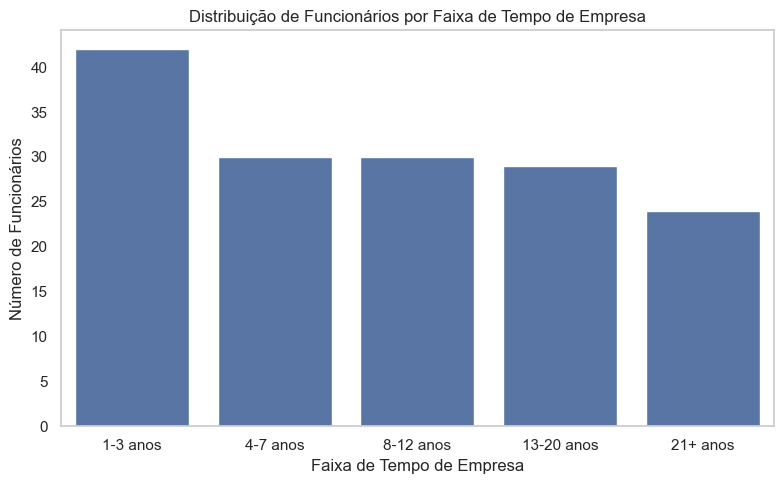

In [ ]:
# Agora, vamos criar um gráfico de barras para visualizar a distribuição dos funcionários por faixa de tempo de empresa.
# sns.set(style="whitegrid")  # Define o estilo do gráfico (opcional)


plt.figure(figsize=(8, 5))
sns.countplot(data=dados, x='Faixa_Tempo_Empresa', order=['1-3 anos', '4-7 anos', '8-12 anos', '13-20 anos', '21+ anos'])
plt.title('Distribuição de Funcionários por Faixa de Tempo de Empresa')
plt.xlabel('Faixa de Tempo de Empresa')
plt.ylabel('Número de Funcionários')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [42]:
# Estatísticas descritivas por faixa de tempo de empresa
# Usando pd.crosstab para calcular a média dos salários anuais por faixa de tempo de empresa
ordem_faixas = ['1-3 anos', '4-7 anos', '8-12 anos', '13-20 anos', '21+ anos']
pd.crosstab(
    index=dados['Faixa_Tempo_Empresa'],
    columns='Salário Médio',
    values=dados['Salario_Anual'],
    aggfunc='mean'
).reindex(index=ordem_faixas).round(2)

col_0,Salário Médio
Faixa_Tempo_Empresa,
1-3 anos,47425.28
4-7 anos,50174.26
8-12 anos,52777.79
13-20 anos,57190.31
21+ anos,65789.71


In [ ]:
# Agora, vamos calcular a média das notas por faixa de tempo de empresa
pd.crosstab(
    index=dados['Faixa_Tempo_Empresa'],
    columns='Nota Média',
    values=dados['Nota'],
    aggfunc='mean'
).reindex(index=ordem_faixas).round(2)

col_0,Nota Média
Faixa_Tempo_Empresa,
1-3 anos,6.33
4-7 anos,5.91
8-12 anos,6.37
13-20 anos,7.04
21+ anos,6.22


In [52]:
pd.crosstab(
    index=dados['Faixa_Tempo_Empresa'],
    columns=dados['Sexo'])

Sexo,F,M
Faixa_Tempo_Empresa,,
1-3 anos,24,18
13-20 anos,18,11
21+ anos,16,8
4-7 anos,19,11
8-12 anos,12,18


In [50]:
# Probabilidade de ter um funcionário com 21+ anos de empresa e ser do sexo feminino
total_funcionarios = dados.shape[0]
# Total de funcionários na amostra
# dados.shape[0] retorna o número total de linhas (funcionários) no DataFrame dados.
# O resultado é armazenado na variável total_funcionarios.
# Agora, vamos calcular o número de funcionários com 21+ anos de empresa e do sexo feminino
total_funcionarios_21_anos_feminino = dados[(dados['Faixa_Tempo_Empresa'] == '21+ anos') & (dados['Sexo'] == 'F')].shape[0]
# Filtra o DataFrame para contar quantos funcionários têm 21+ anos de empresa e são do sexo feminino.
# O resultado é armazenado na variável total_funcionarios_21_anos_feminino.
# Agora, vamos calcular a probabilidade
probabilidade_21_anos_feminino = total_funcionarios_21_anos_feminino / total_funcionarios
# Divide o número de funcionários com 21+ anos de empresa e do sexo feminino pelo total de funcionários.
# O resultado é armazenado na variável probabilidade_21_anos_feminino.
print(f"Probabilidade de um funcionário ter 21+ anos de empresa e ser do sexo feminino: {probabilidade_21_anos_feminino:.3f}")


Probabilidade de um funcionário ter 21+ anos de empresa e ser do sexo feminino: 0.103
